## Dependencias 

In [34]:
import pandas as pd 
from CreditScoringToolkit import AutoCreditScoring,frequency_table
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('display.max_columns',None)

## Lectura de datos 

In [35]:
data = pd.read_csv('../data/sme_survey_mx_clean.csv')

In [36]:
data.head(2)

,id,edadEmprendedor,sexoEmprendedor,escolaridadEmprendedor,dependientesEconomicos,estadoCivil,familiaAyuda,antiguedadNegocio,horaApertura,horaCierre,giroNegocio,numEmpleados,ventasPromedioDiarias,deseoNegocio,registroVentas,registroContabilidad,altaSAT,usaCredito,tiempoCreditoProveedores,promocionNegocio,latitud,longitud
0,E00000000,54,H,universidad trunca,3,casado,False,35.0,9,18,"servicios para el hogar (cerrajería, plomería,...",3,3500.0,eficacia,en un cuaderno,en un sistema especial,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar)...,19.453446,-99.168899
1,E00000001,56,M,universidad terminado,2,viudo,False,37.0,8,15,comercio minorista de materias primas,3,4500.0,bodega,en excel,en excel,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar),19.486575,-99.204668


## Seleción de variables 

In [39]:
frequency_table(data,'altaSAT')

**** Frequency Table for altaSAT ****

         Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
altaSAT                                                          
n               398    0.449718              398         0.449718
o               107    0.120904              505         0.570621
s               380    0.429379              885         1.000000






In [40]:
varc = ['antiguedadNegocio','edadEmprendedor',
 'dependientesEconomicos','numEmpleados','ventasPromedioDiarias']
vard = ['familiaAyuda',
 'escolaridadEmprendedor',
 'estadoCivil',
 'giroNegocio',
 'horaApertura',
 'horaCierre',
 'promocionNegocio',
 'registroContabilidad',
 'registroVentas',
 'sexoEmprendedor',
 'tiempoCreditoProveedores',
 'usaCredito']

data['TARGET'] = (data['altaSAT']!='s').astype(int)

In [41]:
for v in varc:
    data[v] = pd.to_numeric(data[v],errors='coerce')
for v in vard:
    data[v] = data[v].fillna('MISSING').astype(str)

In [42]:
from CreditScoringToolkit import AutoCreditScoring


2025-05-20 21:35:24,789 - CreditScoringToolkit - INFO - Partitioning data...
2025-05-20 21:35:24,794 - CreditScoringToolkit - INFO - Checking partition proportions...
2025-05-20 21:35:24,795 - CreditScoringToolkit - INFO - Train shape: (619, 23)
2025-05-20 21:35:24,796 - CreditScoringToolkit - INFO - Test shape: (266, 23)
2025-05-20 21:35:24,797 - CreditScoringToolkit - INFO - Train target proportion: 0.5702746365105008
2025-05-20 21:35:24,797 - CreditScoringToolkit - INFO - Valid target proportion: 0.5714285714285714
2025-05-20 21:35:24,798 - CreditScoringToolkit - INFO - Outlier treatment...
2025-05-20 21:35:24,807 - CreditScoringToolkit - INFO - Mean statistics before and after outlier treatment
2025-05-20 21:35:24,810 - CreditScoringToolkit - INFO - 

                             Before        After
antiguedadNegocio         12.505029    12.462310
edadEmprendedor           45.780291    45.746365
dependientesEconomicos     2.413570     2.373183
numEmpleados               1.680129   

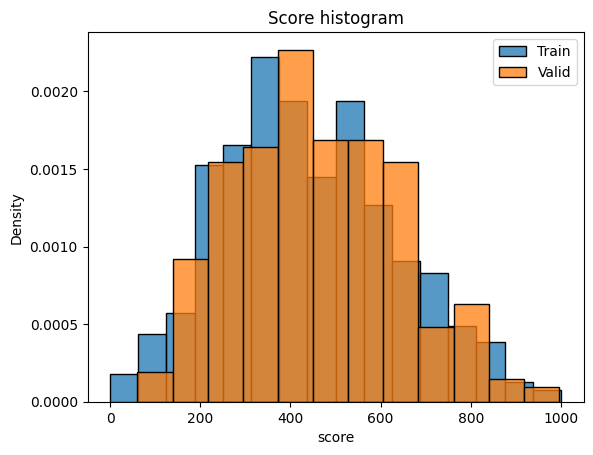

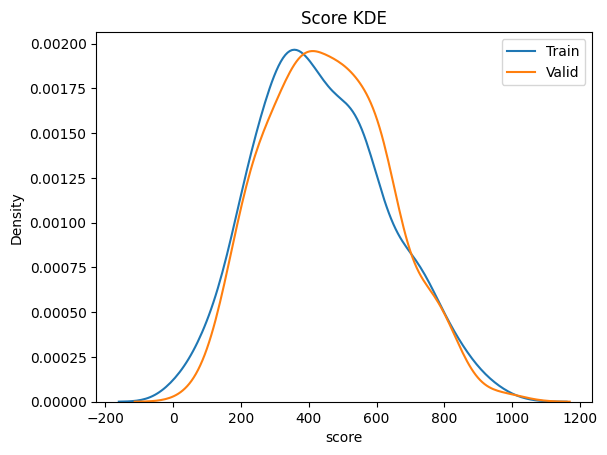

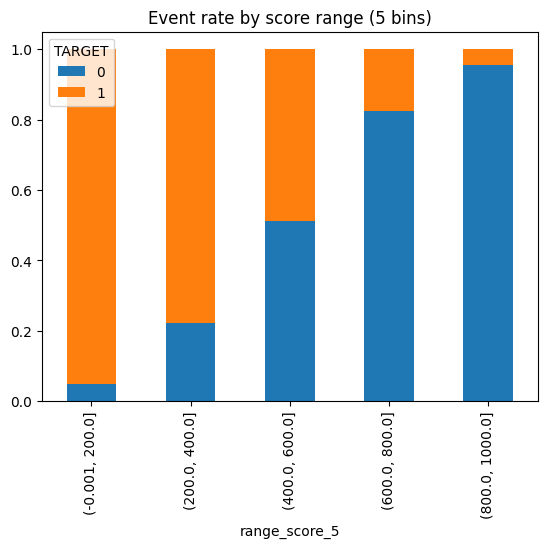

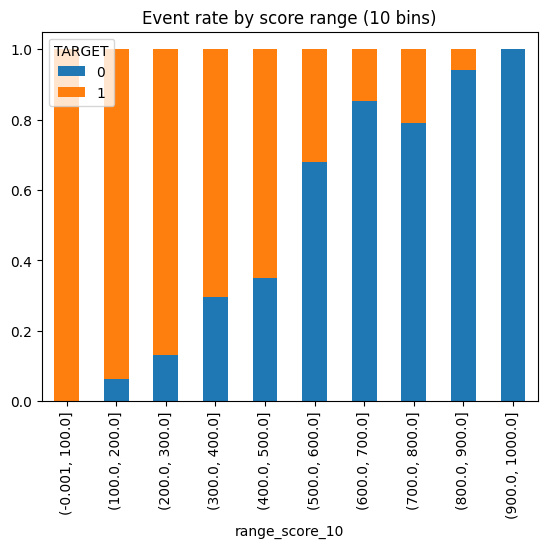

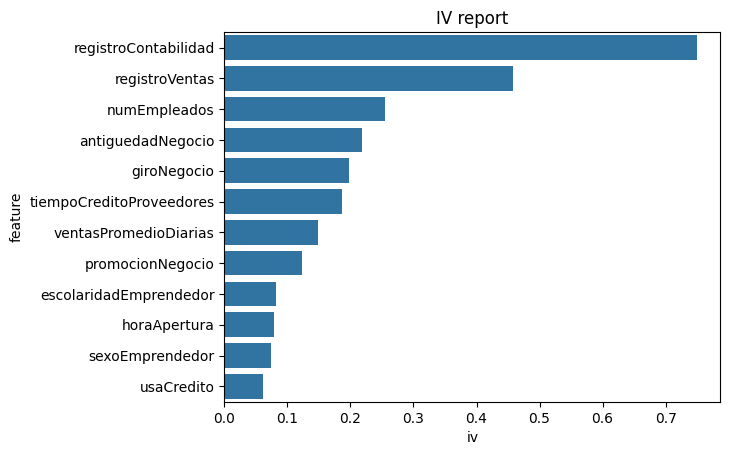

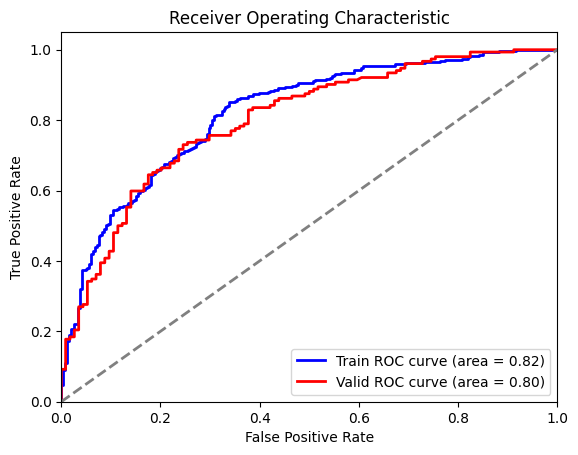

In [43]:

kwargs = {'iv_feature_threshold':0.05,
          'max_discretization_bins':3,
          'strictly_monotonic':True,
          'min_score' : 0,
          'max_score': 1000,
          'treat_outliers':True,
          'verbose':True,
          'discretization_method':'dcc'
          }
acs = AutoCreditScoring(data,'TARGET',varc,vard)
acs.fit(**kwargs)

# You can also save the reports to a folder in PNG format
acs.save_reports('reports')

In [44]:
acs.credit_scoring.scorecard

points
feature                               attribute                                                 
disc_antiguedadNegocio_3_kmeans       (-inf, 12.081]                                          24
                                      (12.081, 27.217]                                        41
                                      (27.217, inf]                                           66
disc_numEmpleados_3_quantile          (-inf, 1.0]                                             27
                                      (1.0, 2.0]                                              40
                                      (2.0, inf]                                              41
disc_ventasPromedioDiarias_3_quantile (-inf, 1000.0]                                          32
                                      (1000.0, 3000.0]                                        33
                                      (3000.0, inf]                                           35
                                      MISSING                                                 34
escolaridadEmprendedor                bachillerato terminado                                  33
                                      bachillerato trunco                                     33
                                      primaria                                                29
                                      secundaria                                              31
                                      universidad terminado                                   40
                                      universidad trunca                                      39
giroNegocio                           OTHER                                                   45
                                      comercio minorista de materias primas                   24
                                      comercio minorista de productos terminados              37
                                      fonda o restaurante/alimentos                           27
                                      servicios  personales(estéticas, spa, uñas, bar...      15
                                      servicios para el hogar (cerrajería, plomería, ...      57
horaApertura                          10                                                      36
                                      11                                                      19
                                      7                                                       42
                                      8                                                       38
                                      9                                                       33
                                      OTHER                                                   26
promocionNegocio                      OTHER                                                   46
                                      otro                                                    31
                                      publicidad exterior                                     30
                                      publicidad exterior|redes sociales (sin pagar)          34
                                      redes sociales (sin pagar)                              38
registroContabilidad                  en excel                                                58
                                      en un cuaderno                                          30
                                      en un sistema especial                                  66
                                      no registro                                              7
registroVentas                        en excel                                                38
                                      en un cuaderno                                          33
                                      en un sistema especial                                  40
                